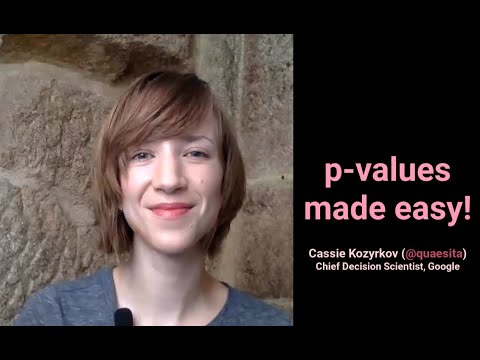

In [1]:
#Q1：
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

Q1：
(1):The video argues that hypothesis testing is only possible if the hypothesis can be defined and verified with data.The video argues that hypothesis testing is only possible if the hypothesis can be defined and verified with data. For example, some subjective views and opinions that have no way to be proven right or wrong by data cannot be verified as true or false by hypothesis testing.

(2):A good null hypothesis is one for which it is easy to find a large amount of reliable data to test, such that it is easy to judge the truth and the conclusions are more reliable.

(3):The difference between null hypothesis and alternative hypothesis is that null hypothesis means that it stays the same and everything is normal, whereas alternative hypothesis is that things change and are not normal. These two hypotheses are in opposition to each other.


Q2：
This statement means that the data we are analysing is intended to investigate changes in the study population as a whole, not in the sample we are sampling for statistics.
xi is a particular piece of data in the sample, the second symbol is a random variable representing the mean of the sample data, the third symbol is a fixed value which describes the overall situation, and the fourth conforms to a hypothetical value. For example, using the distribution of grades of students in a class as an example, the first symbol represents the grades of a particular student, the second symbol represents the class mean, the third symbol represents the true distribution of the class, and the fourth symbol is the distribution of the class as I hypothesised it to be.

Q3：
Because it's hard to prove a hypothesis correct, you have to make sure that all the circumstances are correct in order to show that it must be correct. But to prove that a hypothesis is incorrect all one has to do is to find that one situation is incorrect, and then the hypothesis is not valid. Since the null hypothesis and the alternative hypothesis are completely opposite hypotheses, in order to prove that the alternative hypothesis is correct, we choose to prove that the null hypothesis is wrong to simplify the problem. So that's why we have to think that the null hypothesis is correct.

Q4：This helps us use the data to verify how strong the evidence against it is. We start by assuming that a null hypothesis is correct, so when we calculate the probability p of the null hypothesis occurring based on the data, if the value of p is particularly large, then the hypothesis is correct. If the value of p is particularly small, indicating that the hypothesis is unlikely to occur, then we have enough evidence to reject the null hypothesis and get another result. As the video says, it's almost impossible for a neighbour to put a bin over a dog's head, so there's a high probability that the dog did it himself.

In [10]:
#Q5：
import numpy as np
n = 10000 
sample_size = 124  
right_head = 80  
simulated_data = np.random.binomial(n=sample_size, p=0.5, size=n)
p_value = np.mean(simulated_data >= right_head)
print("P:", p_value)

P: 0.0008


Q5：Conclusion: Because the p-value of 0.008 is significantly lower than 0.05, we have sufficient evidence to reject the null hypothesis. This shows that 80 of 124 couples tilt their heads to the right during kissing, which is unlikely to happen at random. As a result, we infer that when kissing, people tend to lean their heads to the right rather than the left.

Q6：
We don't directly evaluate whether the value of p is large or small; we usually use an interval to indicate whether its evidence is sufficient. The results obtained from a hypothesis test are not necessarily correct because the sample is random and may not be fully representative of the true situation. There are times when the null hypothesis is correct but rejected, or the null hypothesis is wrong but fails to be rejected.For example, in the video, just because the probability of a neighbour coming to make a mess is small, doesn't mean that it's necessarily impossible for it to happen.

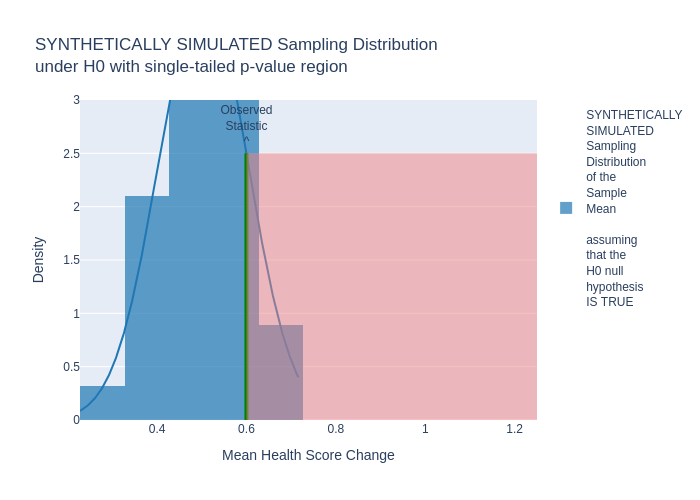

In [5]:
#Q7:
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

IncreaseProportionSimulations_underH0random = np.random.normal(0.5, 0.1, size=124) 
observed_statistic = 0.6  
simulated_data = [IncreaseProportionSimulations_underH0random + np.random.uniform(-0.05, 0.05, size=len(IncreaseProportionSimulations_underH0random))]
labels = ['SYNTHETICALLY<br>SIMULATED<br>Sampling<br>Distribution<br>of the<br>Sample<br>Mean<br><br>assuming<br>that the<br>H0 null<br>hypothesis<br>IS TRUE']
figure = ff.create_distplot(simulated_data, labels, curve_type='normal',
                             show_hist=True, show_rug=False, bin_size=0.1)

p_value_y = 2.5
p_value_y_offset = 0.25
figure.add_shape(type="line", x0=observed_statistic, y0=0, 
                  x1=observed_statistic, y1=p_value_y,
                  line=dict(color="Green", width=4), name="Observed Statistic")
figure.add_trace(go.Scatter(x=[observed_statistic], y=[p_value_y + p_value_y_offset], 
                             text=["Observed<br>Statistic<br>^"], mode="text", showlegend=False))

figure.add_shape(type="rect", x0=observed_statistic, y0=0, x1=1.25, y1=p_value_y,
                  fillcolor="LightCoral", opacity=0.5, line_width=0)

figure.update_layout(
    title="SYNTHETICALLY SIMULATED Sampling Distribution<br>under H0 with single-tailed p-value region",
    xaxis_title="Mean Health Score Change", yaxis_title="Density", yaxis=dict(range=[0, p_value_y + 2 * p_value_y_offset]))
figure.show(renderer="png")




Q7：The main modifications include removing the symmetric statistic calculation and lower tail shading, adjusting the upper tail shading to highlight the region of interest for one-tailed tests, and updating the plot titles accordingly.Converting from a two-tailed test to a one-tailed test produces a value of p that is usually smaller than the original value because the limiting values on one side are ignored, making the data more centralised.

summory:In our dialogue, we discussed how to modify a two-tailed hypothesis test to a one-tailed test using a provided Python code snippet that visualizes a sampling distribution under the null hypothesis. We examined how the p-value is calculated and highlighted in the plot for both types of tests. It was noted that moving from a two-tailed test to a one-tailed test generally leads to a smaller p-value since the latter focuses on extreme values in only one direction. Finally, we clarified that the effect on the p-value depends on the position of the observed statistic relative to the null hypothesis.

link of chatbot:https://chatgpt.com/share/670f1fec-dfbc-8005-87ed-ef03e8765720

In [2]:
# Q8：（1）
import numpy as np
import scipy.stats as stats

n = 80  
X = 49  

num_bootstrap_samples = 10000
bootstrap_proportions = np.zeros(num_bootstrap_samples)

np.random.seed(42) 
for i in range(num_bootstrap_samples):
    sample = np.random.choice([0, 1], size=n, replace=True)
    bootstrap_proportions[i] = np.mean(sample)

observed_proportion = X / n

p_value = np.mean(bootstrap_proportions >= observed_proportion)

print("Observed Proportion:", observed_proportion)
print("Right-tailed p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, indicating that the sample proportion is significantly greater than 0.5.")
else:
    print("Fail to reject the null hypothesis, indicating that the sample proportion is not significantly greater than 0.5.")


Observed Proportion: 0.6125
Right-tailed p-value: 0.0291
Reject the null hypothesis, indicating that the sample proportion is significantly greater than 0.5.


Q8：explanation
This code performs a bootstrap hypothesis test to determine whether the observed proportion of successes in a sample is significantly greater than 0.5. The sample size n is set to 80, with 49 successes (denoted as X). The code generates 10,000 bootstrap samples by randomly selecting from a binary distribution (0 or 1) without replacement, calculating the mean for each sample to estimate the distribution of sample proportions under the null hypothesis. It then calculates the observed proportion as X/n and computes the p-value, which represents the proportion of bootstrap samples that are greater than or equal to the observed proportion. Finally, the code compares the p-value to a significance level alpha of 0.05 to determine whether to reject the null hypothesis, indicating whether the observed sample proportion is significantly greater than 0.5.

Q8：（3） 
conclude
Since the p-value is less than 0.5, the null hypothesis cannot be rejected, so the student can identify the order in which tea and milk were poured


In [ ]:
#Q9： Yes